In [15]:
import numpy as np
import pandas as pd
import seaborn as sns

In [16]:
df = pd.read_csv(
    "C:\\Coding\\python-projects\\ml-jose-portilla\\jose\\08-Linear-Regression-Models\\Advertising.csv"
)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


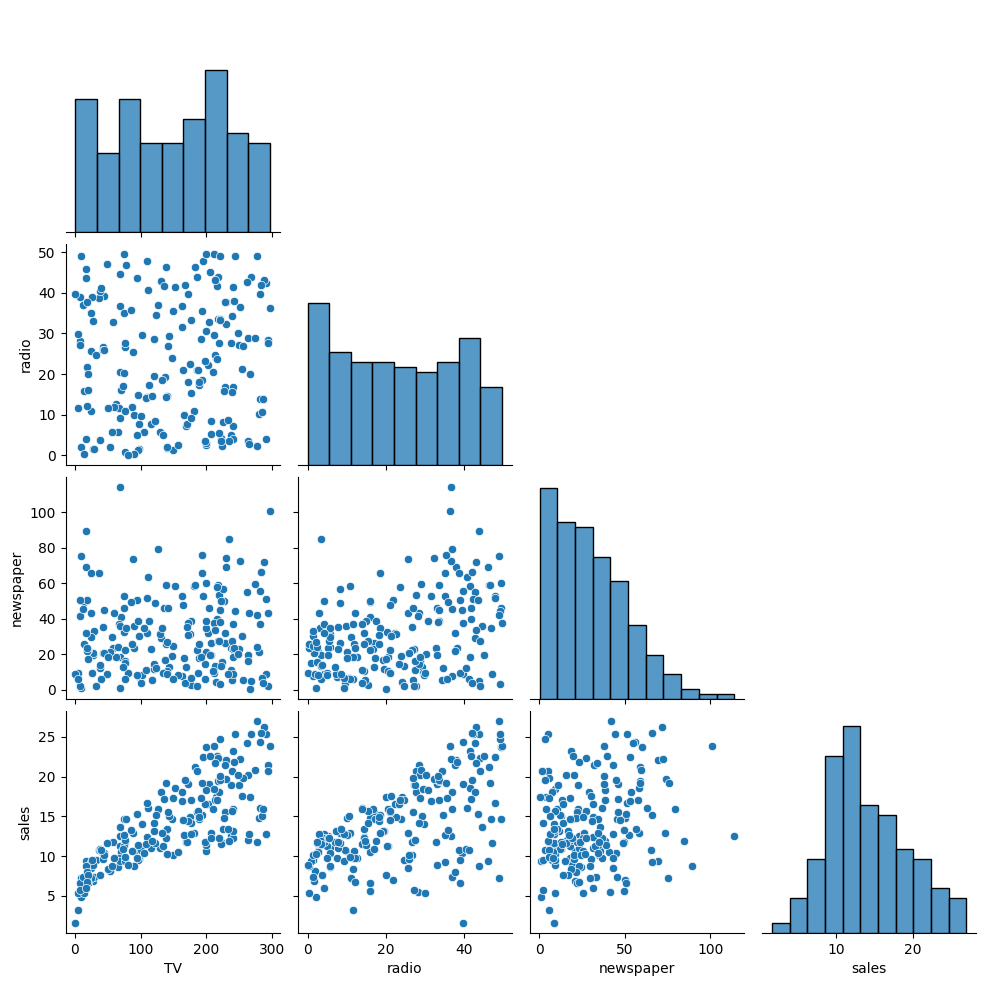

In [17]:
sns.pairplot(df,corner=True)

In [20]:
X = df.drop("sales",axis=1)
y = df["sales"]

In [22]:
from sklearn.model_selection import train_test_split

X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [23]:
X_train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [26]:
model.fit(X_train,y_train)

LinearRegression()

In [31]:
y_pred = model.predict(X_test)

In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, root_mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mse

np.float64(2.2987166978863782)

In [41]:
mae = mean_absolute_error(y_test, y_pred)
mae

np.float64(1.213745773614481)

In [42]:
rmse = root_mean_squared_error(y_test, y_pred)
rmse

np.float64(1.516151937599388)

In [47]:
acc_mae = 100 - np.round(100 * mae / df["sales"].mean(), 2)
acc_mae

np.float64(91.34)

In [80]:
acc_rmse = 100 - np.round(100 * rmse / df["sales"].mean(), 2)
acc_rmse

np.float64(89.19)

In [57]:
test_residuals = y_test - y_pred

<Axes: xlabel='sales', ylabel='sales'>

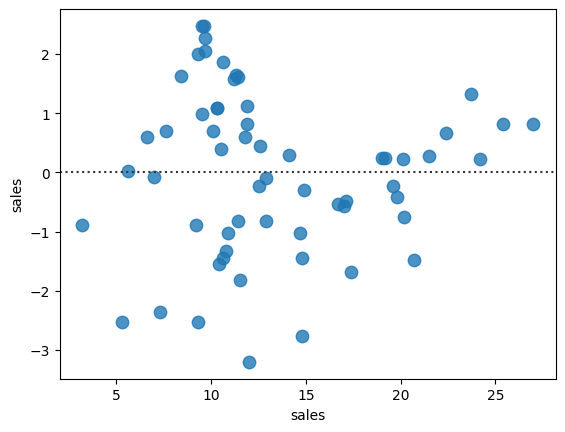

In [68]:
sns.residplot(x=y_test, y=test_residuals, scatter_kws={"s": 80})

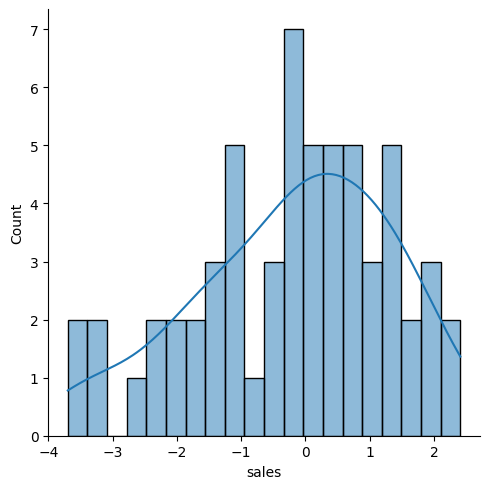

In [70]:
sns.displot(test_residuals,bins=20,kde=True)

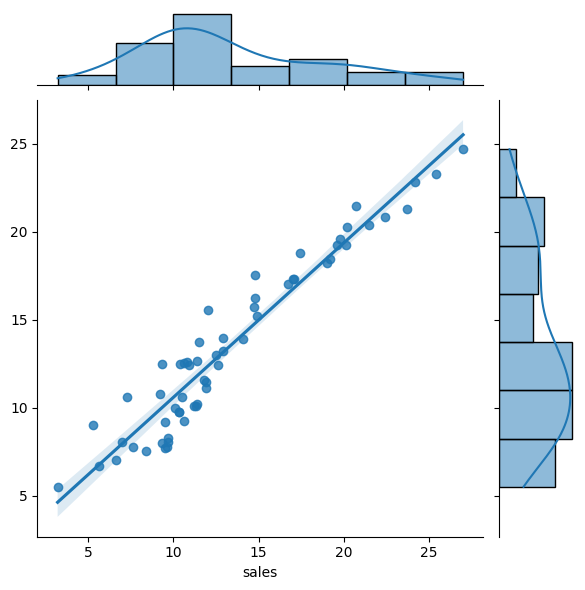

In [78]:
sns.jointplot(x=y_test, y=y_pred, kind="reg")

In [81]:
final_model = LinearRegression()

In [82]:
final_model.fit(X,y)

LinearRegression()

In [83]:
y_pred = final_model.predict(X)

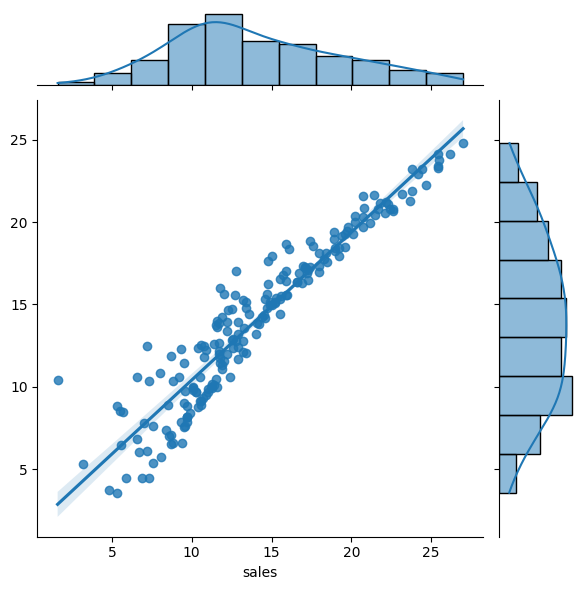

In [84]:
sns.jointplot(x=y,y = y_pred,kind="reg")

In [85]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [86]:
from joblib import dump,load

dump(final_model,"final_sales_model.joblib")

['final_sales_model.joblib']

In [88]:
loaded_model: LinearRegression = load("final_sales_model.joblib")

In [91]:
X.shape

(200, 3)

In [89]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [94]:
## 149 TV 22 Radio 12 Newspaper
## Sales?
new_data = [[149,22,12]]
loaded_model.predict(new_data)

c:\Coding\python-projects\practi-jose\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])